In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
data_path = f"./data/"

# Lectura de datos

In [22]:
def print_df(df):
  print(df.shape)
  return df.head()

In [23]:
df_day_hour_2015 = pd.read_csv(data_path+'/'+'2015_agg_day_hour.csv', index_col=0, parse_dates=True)
print_df(df_day_hour_2015)

(2354, 10)


,Tamb,Tmod,Vdc,Idc,Paparente,Pac,Pdc,Pac*,Pdc*,TONC
Fecha,,,,,,,,,,
2015-06-01 06:00:00,11.381250,3.621667,140.022083,0.263125,102.358333,96.193750,101.430112,90.335991,95.242236,-1.946540
2015-06-01 07:00:00,16.312083,19.704583,372.860417,1.958667,732.851667,727.398333,738.693508,716.112174,727.210904,29.759003
2015-06-01 08:00:00,20.875417,34.196667,357.738333,3.832333,1353.288333,1352.006667,1368.406129,1412.752943,1429.894220,42.724692
2015-06-01 09:00:00,23.332083,42.231667,344.000000,5.378083,1824.089583,1821.449167,1848.645100,1976.192022,2005.712458,43.037435
2015-06-01 10:00:00,24.255000,39.797500,353.690833,4.412125,1527.037083,1532.564583,1545.110308,1647.339160,1661.086193,43.067483


In [24]:
df_day_hour_2018 = pd.read_csv(data_path+'/'+'2018_agg_day_hour.csv', index_col=0, parse_dates=True)
print_df(df_day_hour_2018)

(3696, 10)


,Tamb,Tmod,Vdc,Idc,Paparente,Pac,Pdc,Pac*,Pdc*,TONC
Fecha,,,,,,,,,,
2018-01-30 06:00:00,14.945417,11.300417,341.745000,0.858625,343.448333,330.898750,327.196554,314.320953,310.820310,-1.152757
2018-01-30 07:00:00,20.151250,24.474583,373.353333,2.839542,1058.351667,1053.715417,1054.965792,1055.829966,1057.134548,28.901311
2018-01-30 08:00:00,23.997917,36.523333,350.767083,4.820708,1679.419583,1676.737917,1689.279667,1769.450121,1782.690289,38.186552
2018-01-30 09:00:00,24.956667,38.218750,343.868750,6.095250,2075.194583,2072.307917,2095.193783,2203.707086,2228.078205,35.518307
2018-01-30 10:00:00,25.082917,40.731667,335.557500,7.957000,2628.342500,2624.565417,2669.639887,2824.482855,2872.998378,33.609802


In [25]:
df_day_hour_2017 = pd.read_csv(data_path+'/'+'2017_agg_day_hour.csv', index_col=0, parse_dates=True)
print_df(df_day_hour_2017)

(3773, 10)


,Tamb,Tmod,Vdc,Idc,Paparente,Pac,Pdc,Pac*,Pdc*,TONC
Fecha,,,,,,,,,,
2017-01-01 06:00:00,18.332500,16.995417,383.942917,1.175042,464.887083,455.408333,451.989621,441.821121,438.496964,6.042198
2017-01-01 07:00:00,22.321250,30.272083,374.950000,2.925125,1095.325417,1091.558750,1093.614275,1121.598759,1123.749676,36.922743
2017-01-01 08:00:00,24.961250,38.689583,356.565833,4.966667,1757.545000,1755.746667,1768.960983,1871.202144,1885.285511,38.080451
2017-01-01 09:00:00,25.222917,40.076667,347.599583,6.470000,2224.939583,2223.026250,2248.890346,2384.230654,2411.958771,35.146449
2017-01-01 10:00:00,24.296250,40.131250,342.759583,7.692000,2598.814167,2596.799583,2636.285487,2786.462959,2828.823842,33.590908


# Visualización


In [26]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
from itertools import product
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Visualización 2015

### Gráficos para un rango de tiempo 

In [103]:
data = df_day_hour_2015.copy()

In [104]:
data.head()

,Tamb,Tmod,Vdc,Idc,Paparente,Pac,Pdc,Pac*,Pdc*,TONC
Fecha,,,,,,,,,,
2015-06-01 04:00:00,11.241667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-06-01 05:00:00,10.607917,0.026250,0.000000,0.000000,0.201667,0.017500,0.000000,0.016142,0.000000,-0.170635
2015-06-01 06:00:00,11.381250,3.621667,140.022083,0.263125,102.358333,96.193750,101.430112,90.335991,95.242236,-1.946540
2015-06-01 07:00:00,16.312083,19.704583,372.860417,1.958667,732.851667,727.398333,738.693508,716.112174,727.210904,29.759003
2015-06-01 08:00:00,20.875417,34.196667,357.738333,3.832333,1353.288333,1352.006667,1368.406129,1412.752943,1429.894220,42.724692


In [105]:
# data = data.dropna()
data.shape

(3424, 10)

In [106]:
pd.DataFrame(data.index)

,Fecha
0,2015-06-01 04:00:00
1,2015-06-01 05:00:00
2,2015-06-01 06:00:00
3,2015-06-01 07:00:00
4,2015-06-01 08:00:00
...,...
3419,2015-12-31 15:00:00
3420,2015-12-31 16:00:00
3421,2015-12-31 17:00:00
3422,2015-12-31 18:00:00


In [107]:
def plot_between_dates_by_hour (data, col_name, fecha_ini, fecha_fin):
  plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
  
  plt_data = data.loc[fecha_ini:fecha_fin]
  plt.plot(plt_data.index, plt_data[col_name])
  plt.title(col_name+' por horas')
  plt.ylabel(col_name)
  plt.xlabel('Horas')
  plt.xticks(rotation=90)
  plt.grid(True)
  plt.show()

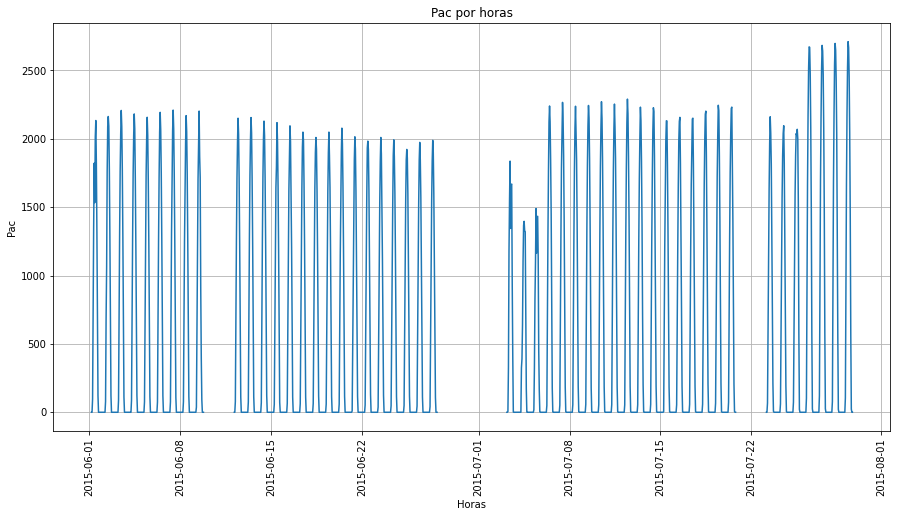

In [108]:
col_name = 'Pac'
fecha_ini = pd.to_datetime('2015-06-01')
fecha_fin = pd.to_datetime('2015-07-30')
plot_between_dates_by_hour(data, col_name, fecha_ini, fecha_fin)

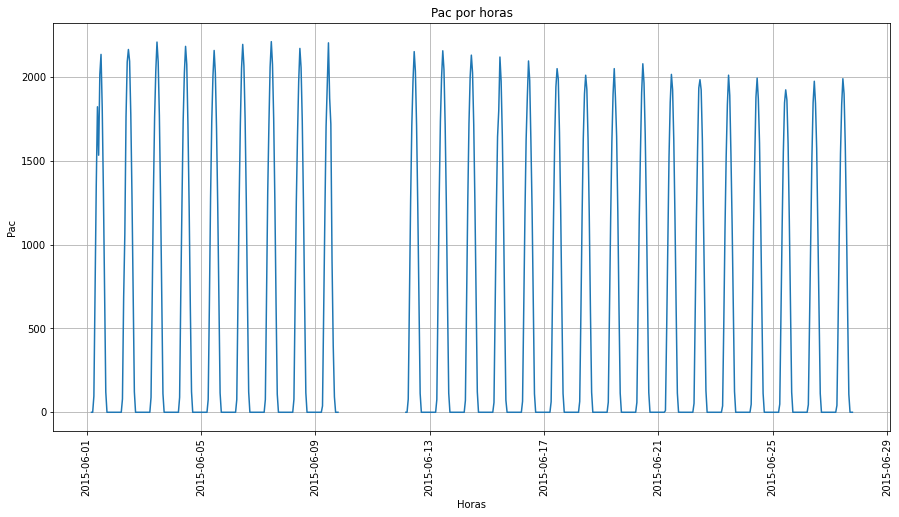

In [109]:
col_name = 'Pac'
fecha_ini = pd.to_datetime('2015-06-01')
fecha_fin = pd.to_datetime('2015-06-30')
plot_between_dates_by_hour(data, col_name, fecha_ini, fecha_fin)

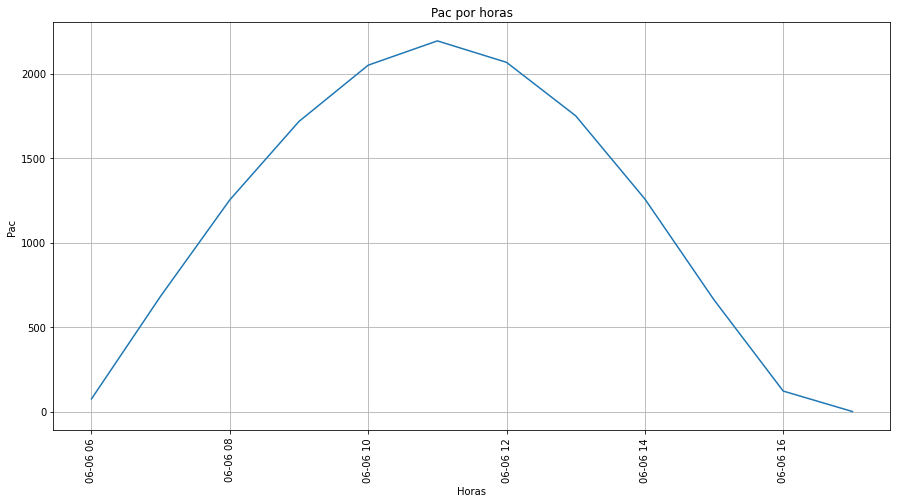

In [110]:
col_name = 'Pac'
fecha_ini = pd.to_datetime('2015-06-06 06:00')
fecha_fin = pd.to_datetime('2015-06-06 17:00')
plot_between_dates_by_hour(data, col_name, fecha_ini, fecha_fin)

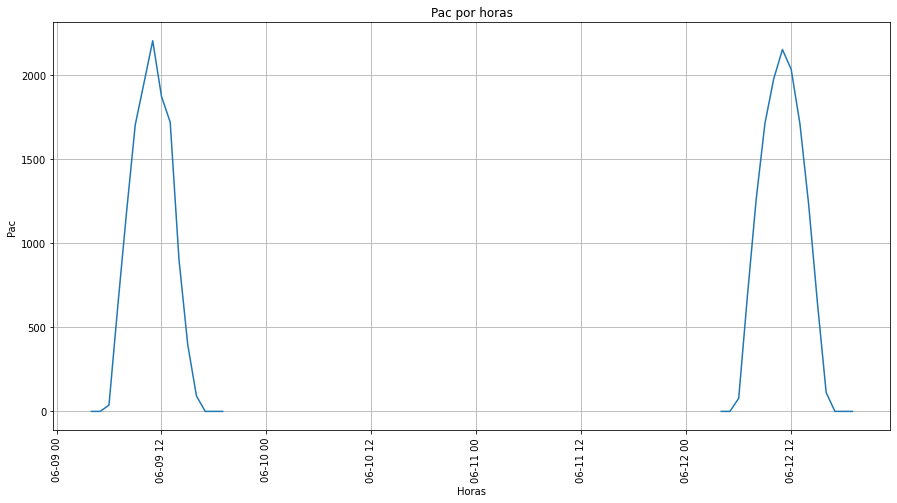

In [111]:
col_name = 'Pac'
fecha_ini = pd.to_datetime('2015-06-09')
fecha_fin = pd.to_datetime('2015-06-13')
plot_between_dates_by_hour(data, col_name, fecha_ini, fecha_fin)

### Graficos por hora del día

#### Plot para las 8 am

In [112]:
def plot_all_year_for_an_hour (data, hour, col_name, fecha_ini=None, fecha_fin=None):
  if fecha_ini is not None and fecha_fin is not None:
    data = data.loc[fecha_ini:fecha_fin]
  plt_data = data.loc[data.index.hour==hour]
  plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
  plt.plot(plt_data.index, plt_data[col_name])
  plt.title(col_name+' para la hora '+str(hour))
  plt.ylabel(col_name)
  plt.xlabel('Fecha')
  plt.xticks(rotation=90)
  plt.grid(True)
  plt.show()

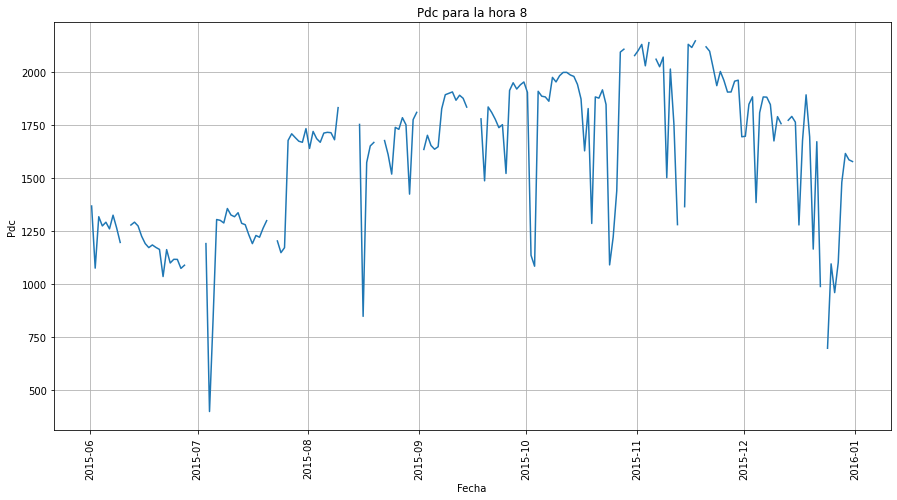

In [113]:
col_name = 'Pdc'
# fecha_ini = pd.to_datetime('2015-06-09')
# fecha_fin = pd.to_datetime('2015-06-20')
plot_all_year_for_an_hour(data, 8, col_name)#, fecha_ini, fecha_fin)

#### Boxplot para todas las horas 

In [114]:
def boxplot_all_data_for_an_hour (data, hours, col_name, fecha_ini=None, fecha_fin=None, mes=None):
  if fecha_ini is not None and fecha_fin is not None:
    data = data.loc[fecha_ini:fecha_fin]
  # plt_data = data.loc[data.index.hour==hour]
  my_dict={hour:(data.loc[data.index.hour==hour][col_name].dropna()) for hour in hours}
  
  plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
  fig, ax = plt.subplots()
#   print(dir(fig))
  fig.set_size_inches(15, 7.5)
  ax.boxplot(my_dict.values())
  ax.set_xticklabels(my_dict.keys())
  if mes:
    plt.title(col_name+' para cada hora para mes '+str(mes))
  else:
    plt.title(col_name+' para cada hora ')
  plt.ylabel(col_name)
  plt.xlabel('Horas')
  plt.xticks(rotation=90)
  plt.grid(True)
  plt.show()

<Figure size 1080x540 with 0 Axes>

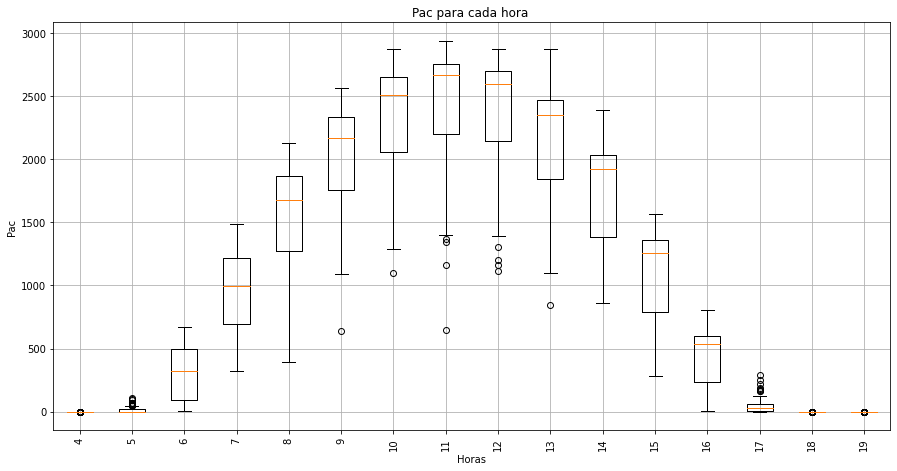

In [115]:
col_name = 'Pac'
# fecha_ini = pd.to_datetime('2015-06-09')
# fecha_fin = pd.to_datetime('2015-06-20')
boxplot_all_data_for_an_hour(data, range(4,20), col_name)#, fecha_ini, fecha_fin)

#### Gráficos para todas las horas para cada mes

In [116]:
# def plot_n_boxplots(data_ls, n, col_name):
#     fig, (ax1, ax2) = plt.subplots(n, sharex=True)
#     fig.suptitle('Aligning x-axis using sharex')
#     ax1.plot(x, y)
#     boxplot_all_data_for_an_hour
#     ax2.plot(x + 1, -y)

<Figure size 1080x540 with 0 Axes>

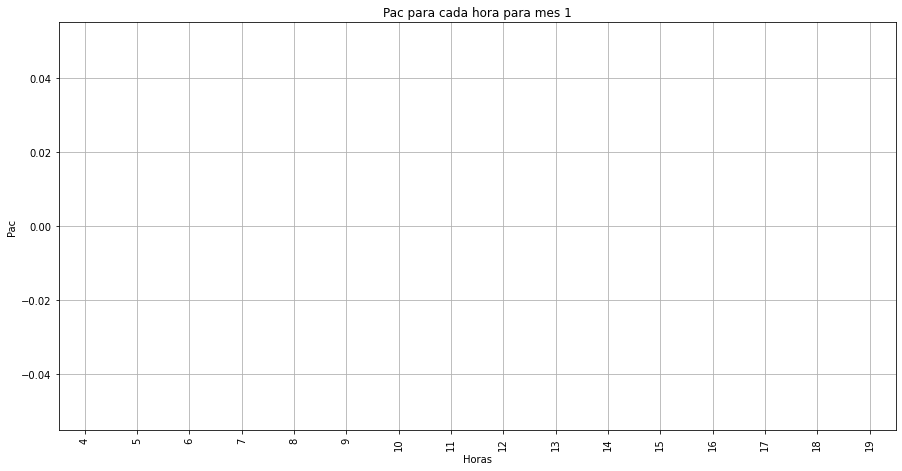

<Figure size 1080x540 with 0 Axes>

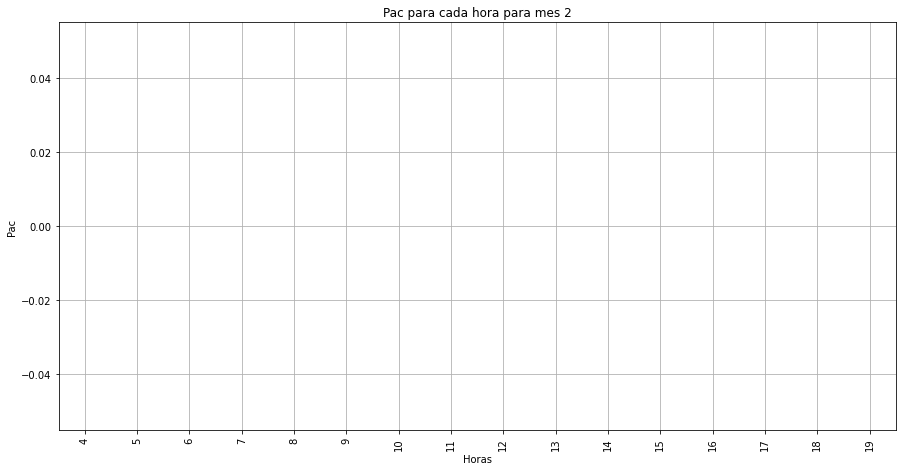

<Figure size 1080x540 with 0 Axes>

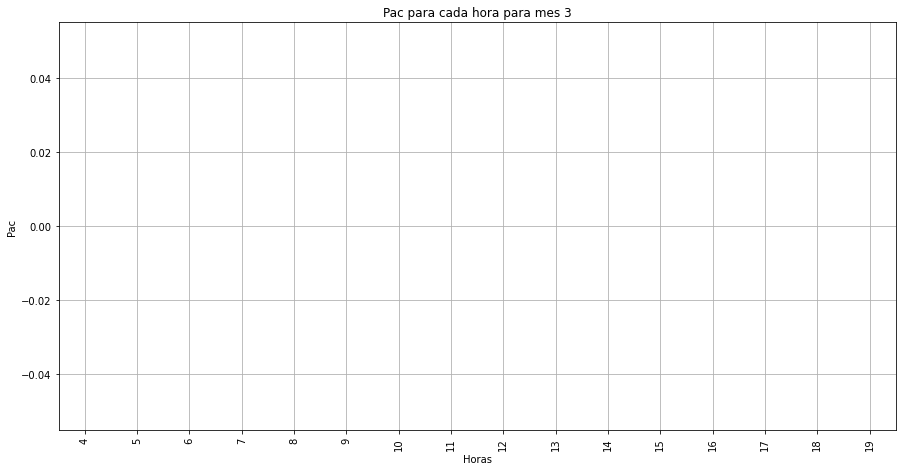

<Figure size 1080x540 with 0 Axes>

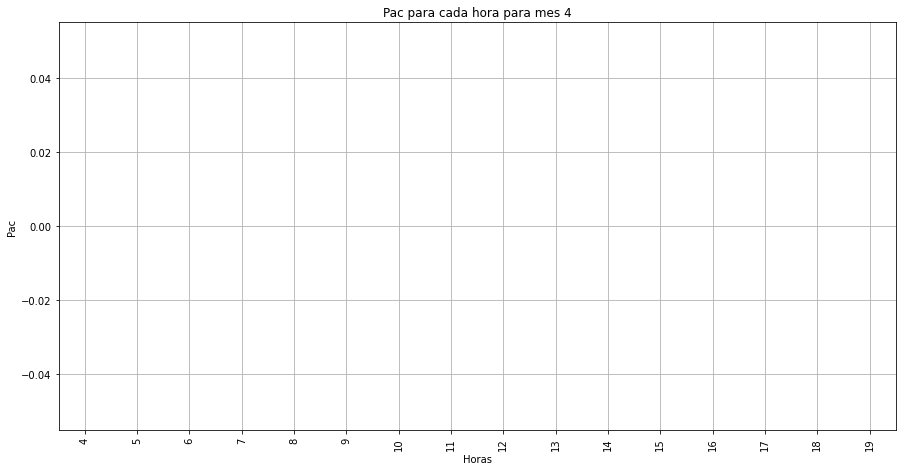

<Figure size 1080x540 with 0 Axes>

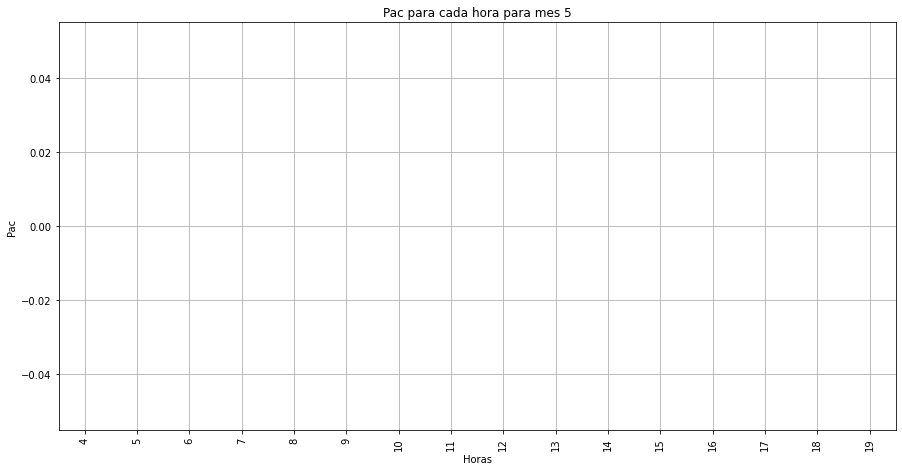

<Figure size 1080x540 with 0 Axes>

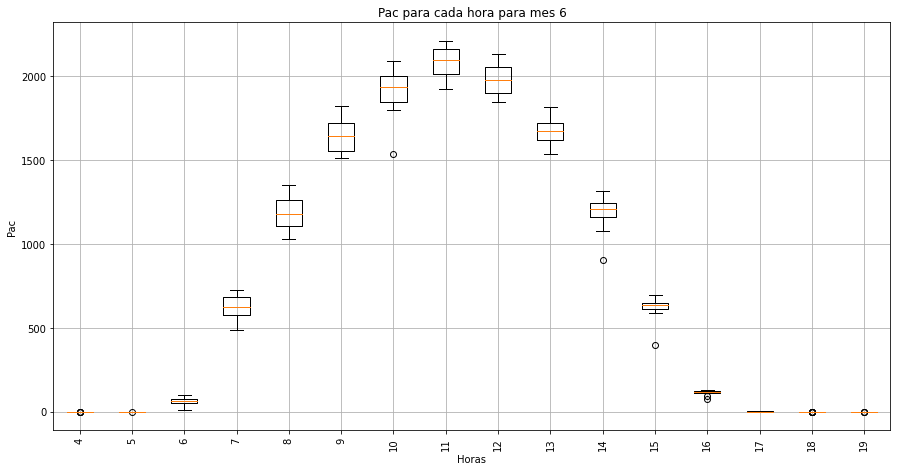

<Figure size 1080x540 with 0 Axes>

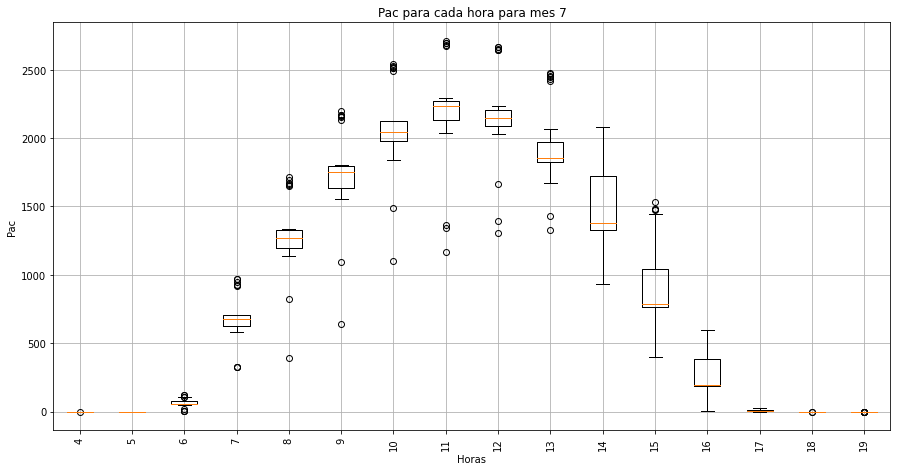

<Figure size 1080x540 with 0 Axes>

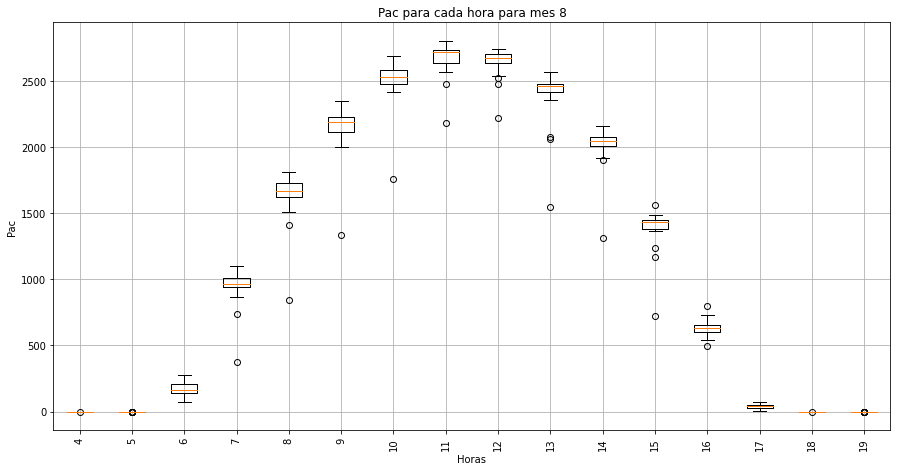

<Figure size 1080x540 with 0 Axes>

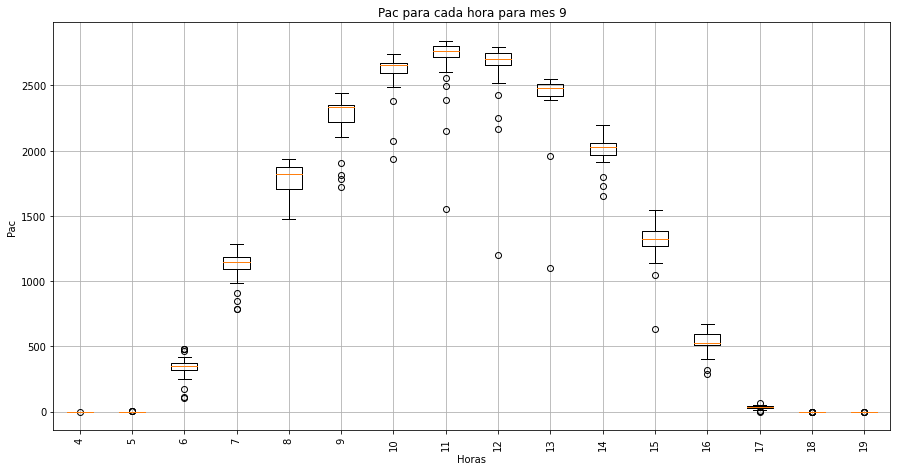

<Figure size 1080x540 with 0 Axes>

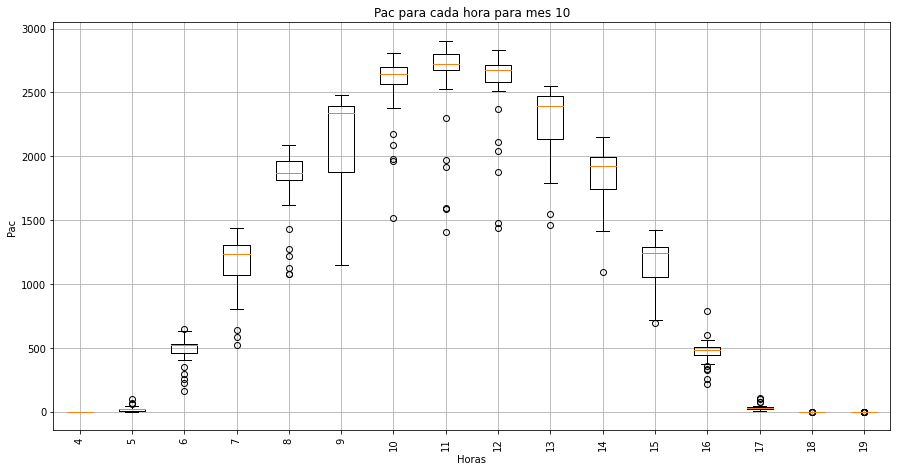

<Figure size 1080x540 with 0 Axes>

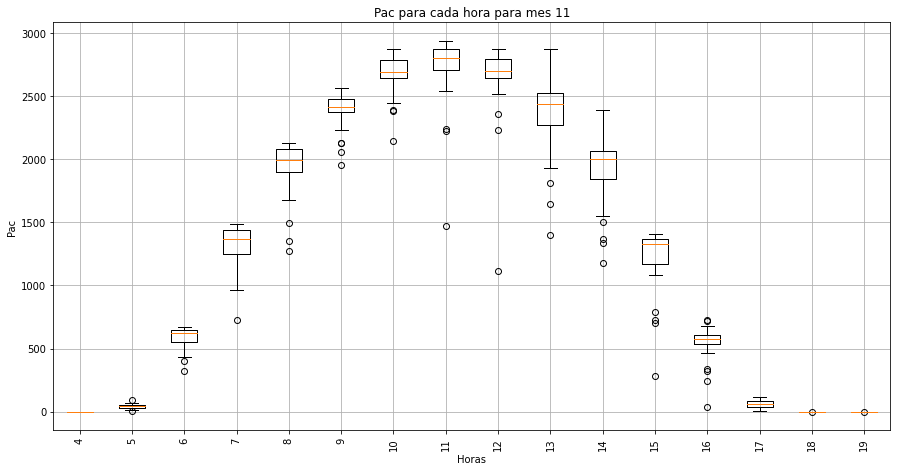

<Figure size 1080x540 with 0 Axes>

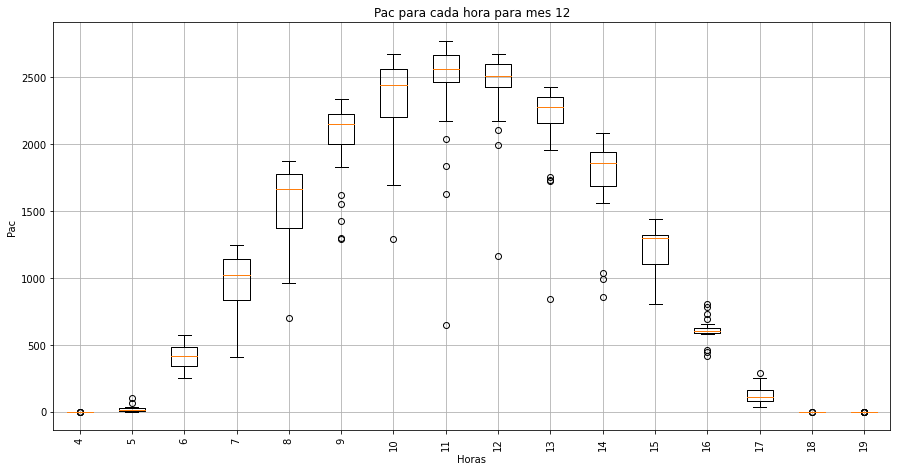

In [117]:

col_name = 'Pac'
for i in range(1,12+1):
    data_m = data.loc[data.index.month==i]
    boxplot_all_data_for_an_hour(data_m, range(4,20), col_name, mes=i)

## Visualización 2018

### Gráficos para un rango de tiempo 

In [87]:
data = df_day_hour_2018.copy()

In [88]:
data.head()

,Tamb,Tmod,Vdc,Idc,Paparente,Pac,Pdc,Pac*,Pdc*,TONC
Fecha,,,,,,,,,,
2018-01-30 04:00:00,13.621250,0.041250,0.000000,0.000000,0.177917,0.017917,0.000000,0.016777,0.000000,-0.123016
2018-01-30 05:00:00,12.716667,0.042083,1.452917,0.000708,0.406667,0.265000,0.246996,0.248348,0.231475,-0.080409
2018-01-30 06:00:00,14.945417,11.300417,341.745000,0.858625,343.448333,330.898750,327.196554,314.320953,310.820310,-1.152757
2018-01-30 07:00:00,20.151250,24.474583,373.353333,2.839542,1058.351667,1053.715417,1054.965792,1055.829966,1057.134548,28.901311
2018-01-30 08:00:00,23.997917,36.523333,350.767083,4.820708,1679.419583,1676.737917,1689.279667,1769.450121,1782.690289,38.186552


In [89]:
# data = data.dropna()
data.shape

(5376, 10)

In [90]:
pd.DataFrame(data.index)

,Fecha
0,2018-01-30 04:00:00
1,2018-01-30 05:00:00
2,2018-01-30 06:00:00
3,2018-01-30 07:00:00
4,2018-01-30 08:00:00
...,...
5371,2018-12-31 15:00:00
5372,2018-12-31 16:00:00
5373,2018-12-31 17:00:00
5374,2018-12-31 18:00:00


In [91]:
def plot_between_dates_by_hour (data, col_name, fecha_ini, fecha_fin):
  plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
  
  plt_data = data.loc[fecha_ini:fecha_fin]
  plt.plot(plt_data.index, plt_data[col_name])
  plt.title(col_name+' por horas')
  plt.ylabel(col_name)
  plt.xlabel('Horas')
  plt.xticks(rotation=90)
  plt.grid(True)
  plt.show()

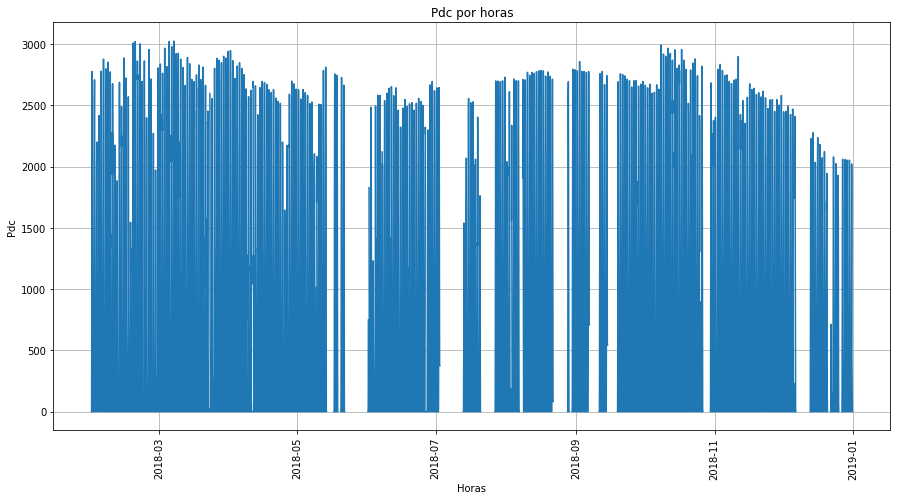

In [92]:
col_name = 'Pdc'
fecha_ini = pd.to_datetime('2018-01-01')
fecha_fin = pd.to_datetime('2019-01-01')
plot_between_dates_by_hour(data, col_name, fecha_ini, fecha_fin)

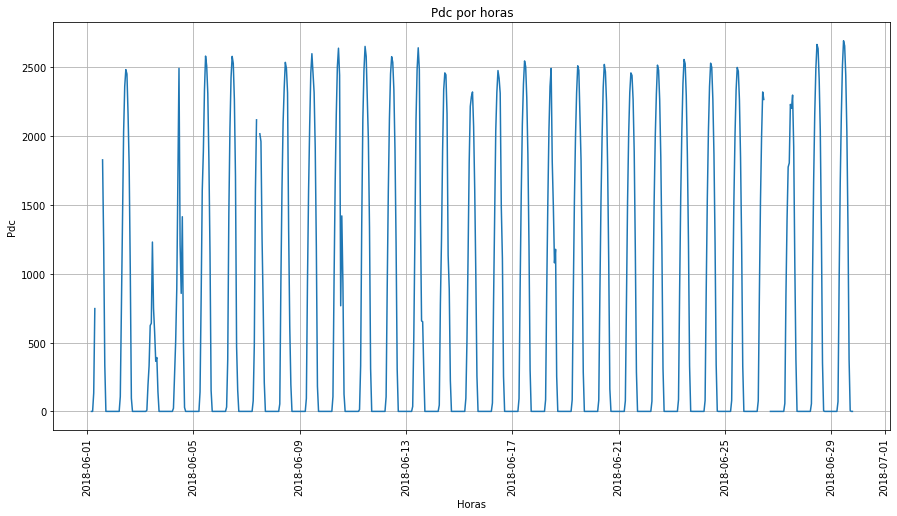

In [93]:
col_name = 'Pdc'
fecha_ini = pd.to_datetime('2018-06-01')
fecha_fin = pd.to_datetime('2018-06-30')
plot_between_dates_by_hour(data, col_name, fecha_ini, fecha_fin)

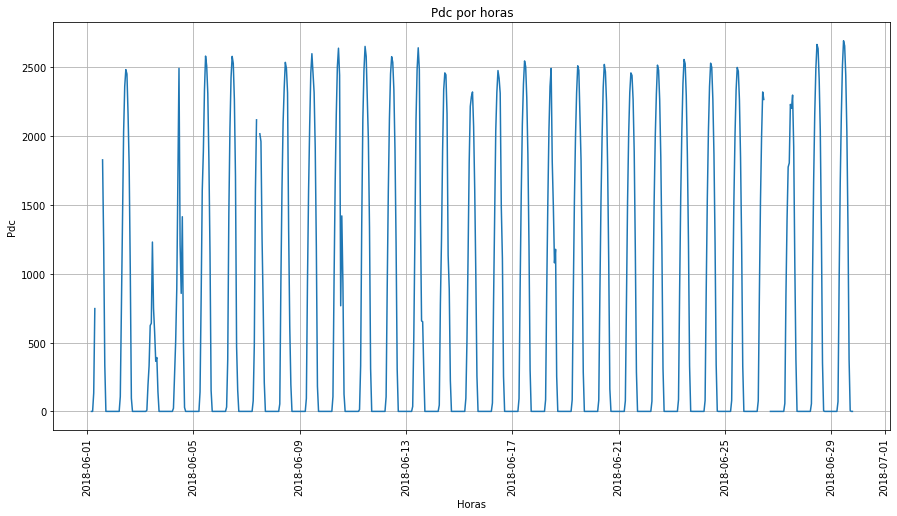

In [94]:
col_name = 'Pdc'
fecha_ini = pd.to_datetime('2018-06-01')
fecha_fin = pd.to_datetime('2018-06-30')
plot_between_dates_by_hour(data, col_name, fecha_ini, fecha_fin)

In [95]:
# plot_pacf(data['Pdc']);
# plot_acf(data['Pdc']);

In [96]:
# ad_fuller_result = adfuller(data['Pdc'])
# print(f'ADF Statistic: {ad_fuller_result[0]}')
# print(f'p-value: {ad_fuller_result[1]}')

### Graficos por hora del día

#### Plot para las 8

In [97]:
def plot_all_year_for_an_hour (data, hour, col_name, fecha_ini=None, fecha_fin=None):
  if fecha_ini is not None and fecha_fin is not None:
    data = data.loc[fecha_ini:fecha_fin]
  plt_data = data.loc[data.index.hour==hour]
  plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
  plt.plot(plt_data.index, plt_data[col_name])
  plt.title(col_name+' para la hora '+str(hour))
  plt.ylabel(col_name)
  plt.xlabel('Fecha')
  plt.xticks(rotation=90)
  plt.grid(True)
  plt.show()

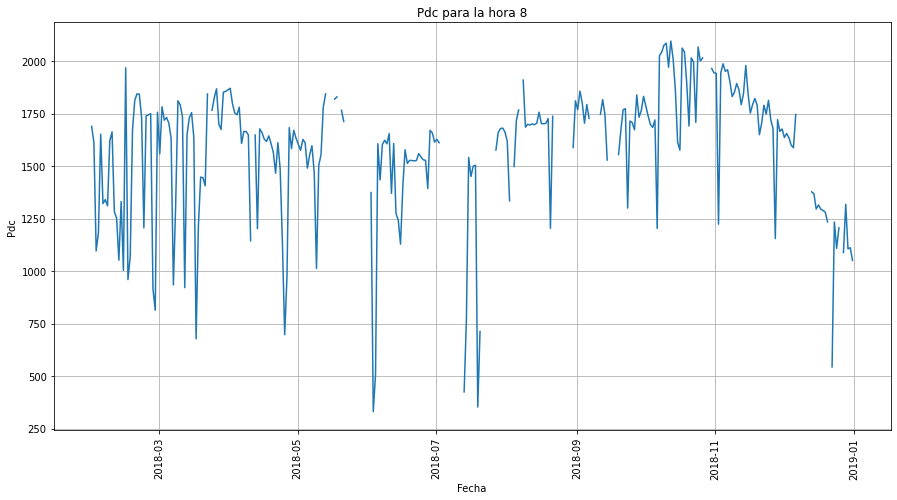

In [98]:
col_name = 'Pdc'
# fecha_ini = pd.to_datetime('2015-06-09')
# fecha_fin = pd.to_datetime('2015-06-20')
plot_all_year_for_an_hour(data, 8, col_name)#, fecha_ini, fecha_fin)

### Boxplot para todas las horas 

In [99]:
def boxplot_all_data_for_an_hour (data, hours, col_name, fecha_ini=None, fecha_fin=None, mes=None):
  if fecha_ini is not None and fecha_fin is not None:
    data = data.loc[fecha_ini:fecha_fin]
  # plt_data = data.loc[data.index.hour==hour]
  my_dict={hour:(data.loc[data.index.hour==hour][col_name].dropna()) for hour in hours}
  
  plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
  fig, ax = plt.subplots()
#   print(dir(fig))
  fig.set_size_inches(15, 7.5)
  ax.boxplot(my_dict.values())
  ax.set_xticklabels(my_dict.keys())
  if mes:
    plt.title(col_name+' para cada hora para mes '+str(mes))
  else:
    plt.title(col_name+' para cada hora ')
  plt.ylabel(col_name)
  plt.xlabel('Horas')
  plt.xticks(rotation=90)
  plt.grid(True)
  plt.show()

<Figure size 1080x540 with 0 Axes>

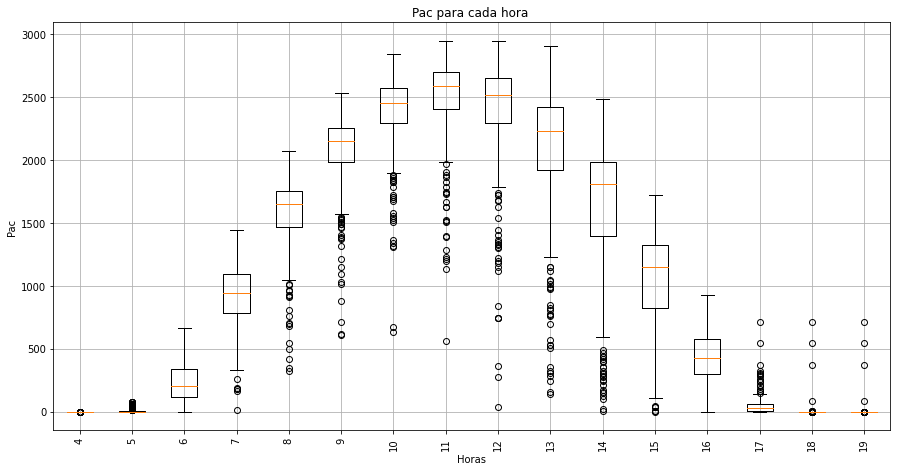

In [100]:
col_name = 'Pac'
# fecha_ini = pd.to_datetime('2015-06-09')
# fecha_fin = pd.to_datetime('2015-06-20')
boxplot_all_data_for_an_hour(data, range(4,20), col_name)#, fecha_ini, fecha_fin)

#### Gráficos para todas las horas para cada mes

In [101]:
# def plot_n_boxplots(data_ls, n, col_name):
#     fig, (ax1, ax2) = plt.subplots(n, sharex=True)
#     fig.suptitle('Aligning x-axis using sharex')
#     ax1.plot(x, y)
#     boxplot_all_data_for_an_hour
#     ax2.plot(x + 1, -y)

<Figure size 1080x540 with 0 Axes>

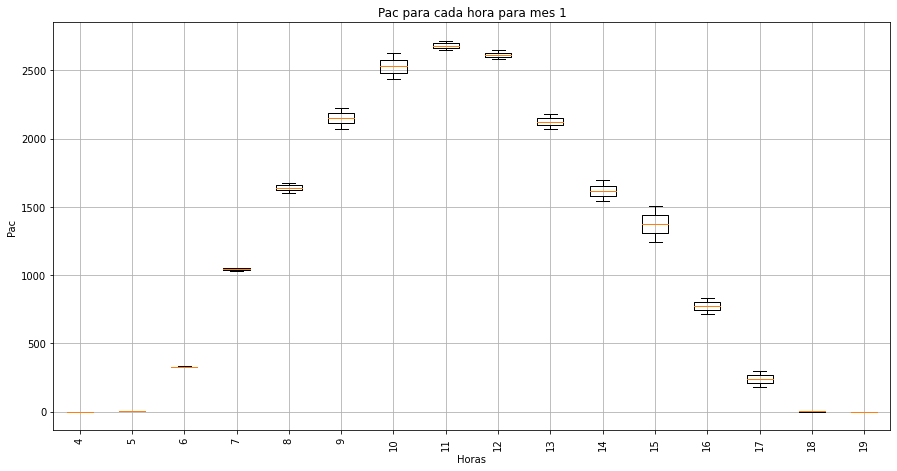

<Figure size 1080x540 with 0 Axes>

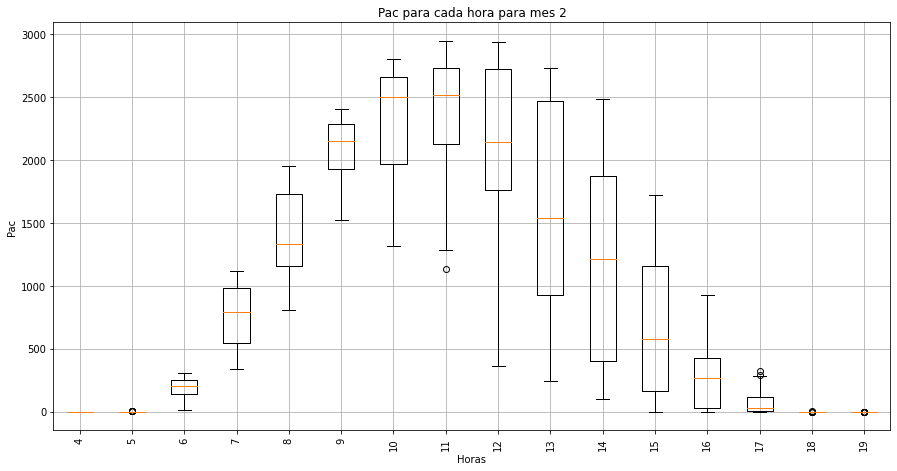

<Figure size 1080x540 with 0 Axes>

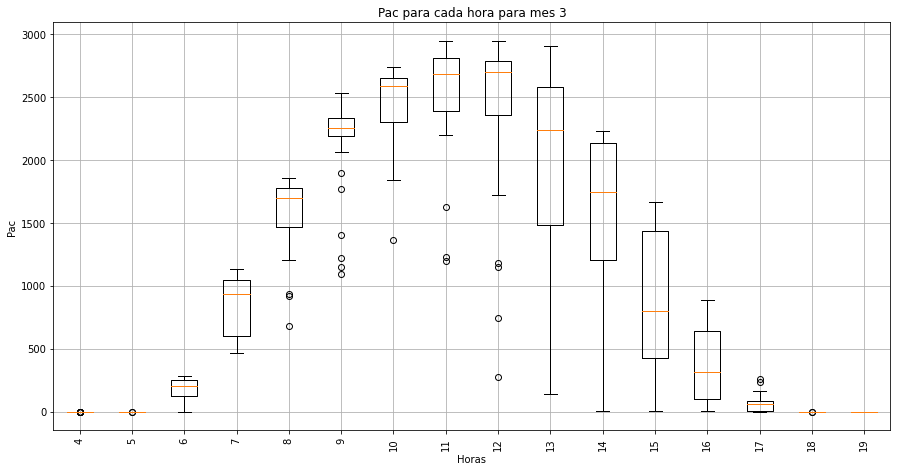

<Figure size 1080x540 with 0 Axes>

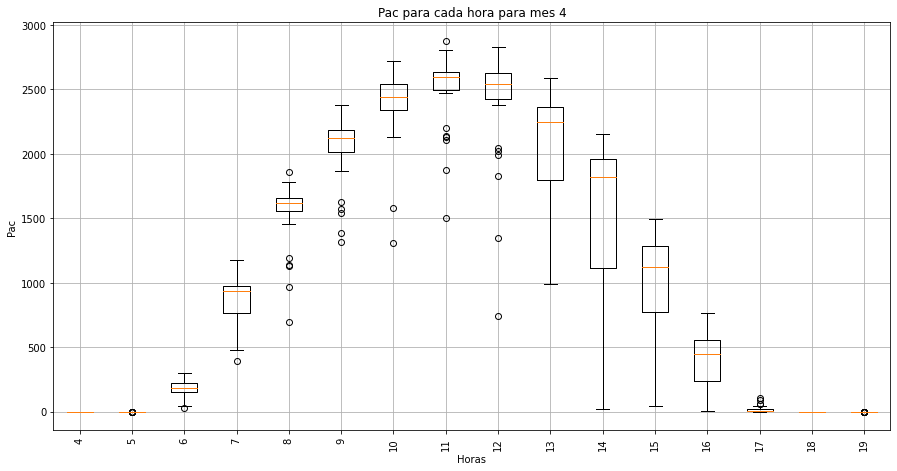

<Figure size 1080x540 with 0 Axes>

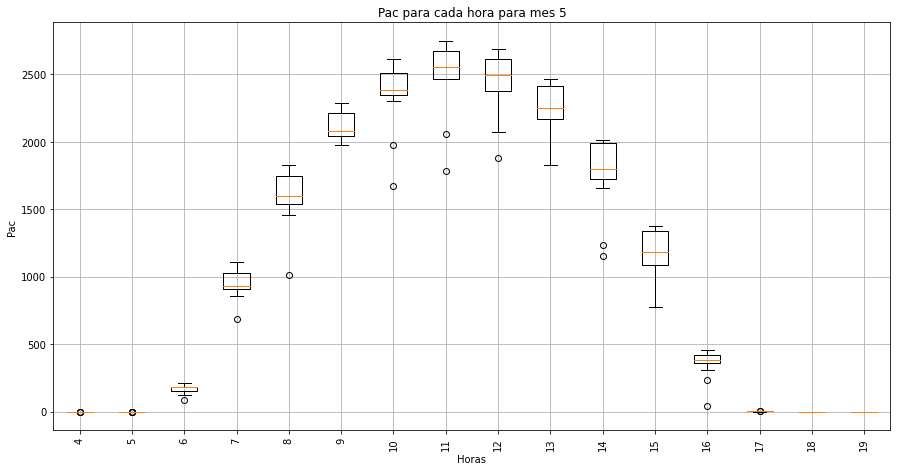

<Figure size 1080x540 with 0 Axes>

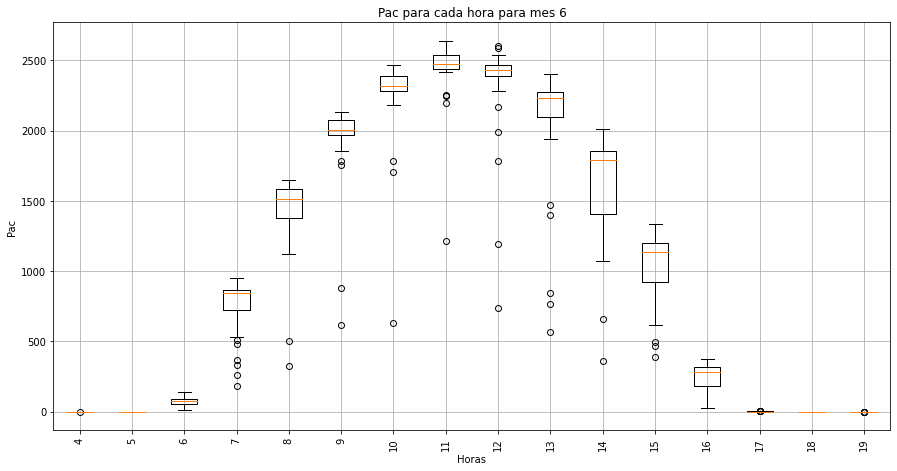

<Figure size 1080x540 with 0 Axes>

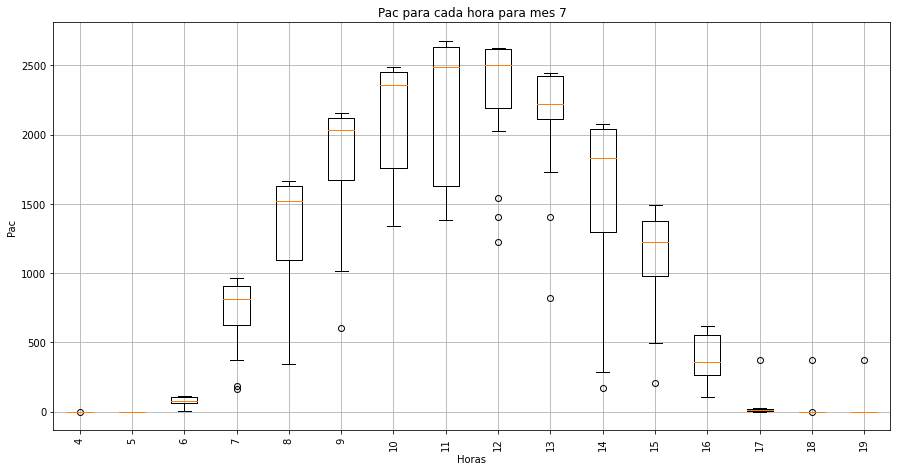

<Figure size 1080x540 with 0 Axes>

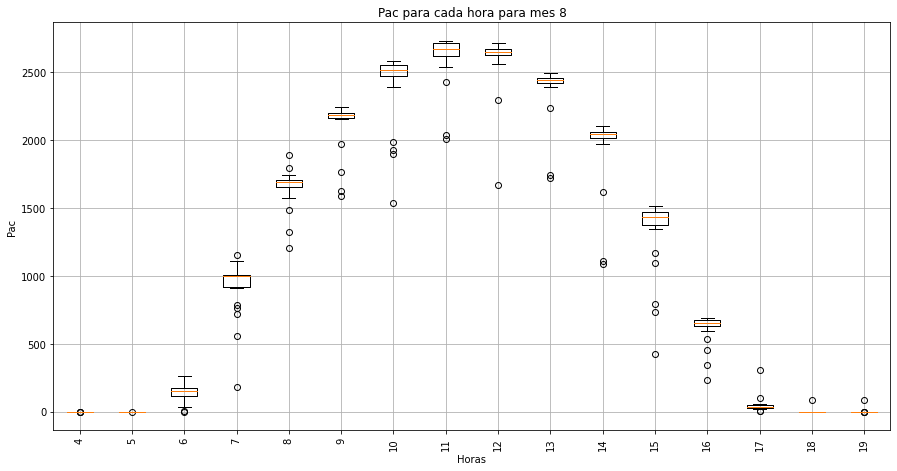

<Figure size 1080x540 with 0 Axes>

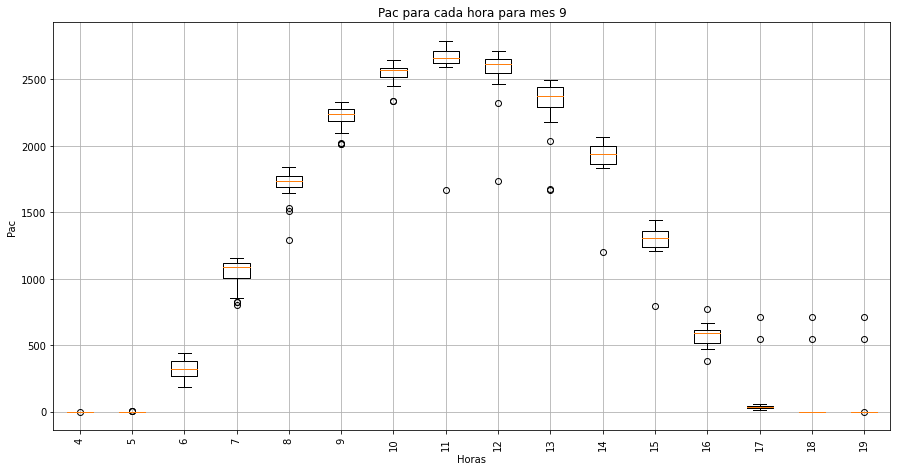

<Figure size 1080x540 with 0 Axes>

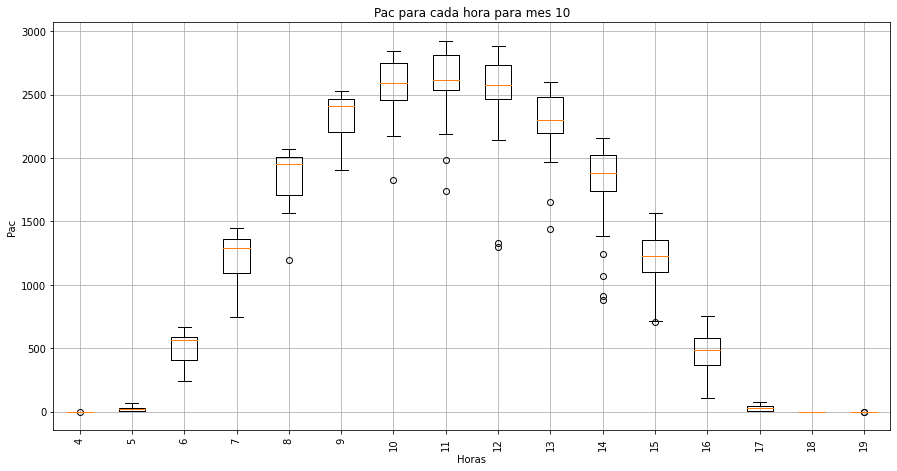

<Figure size 1080x540 with 0 Axes>

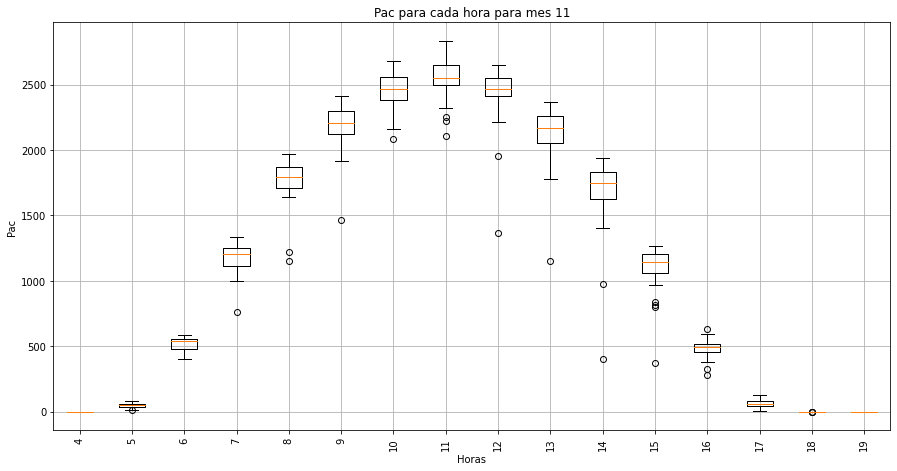

<Figure size 1080x540 with 0 Axes>

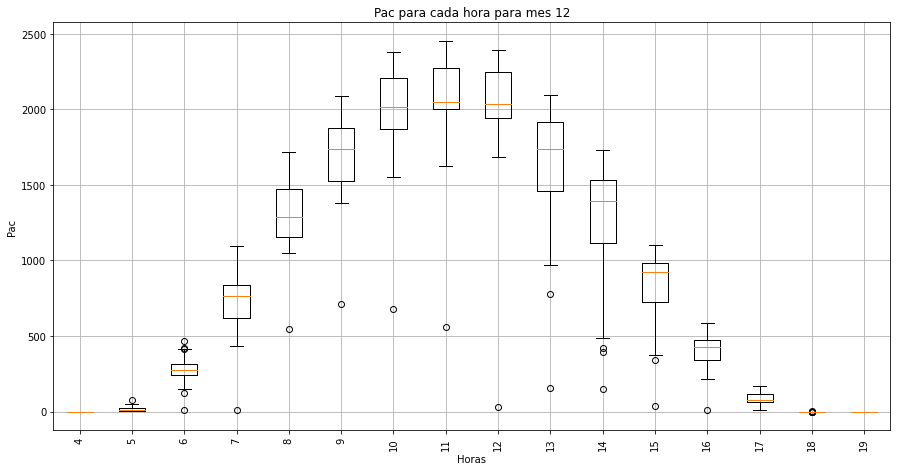

In [102]:

col_name = 'Pac'
for i in range(1,12+1):
    data_m = data.loc[data.index.month==i]
    boxplot_all_data_for_an_hour(data_m, range(4,20), col_name, mes=i)

## Visualización 2017

### Gráficos para un rango de tiempo 

In [27]:
data = df_day_hour_2017.copy()

In [28]:
data.head()

,Tamb,Tmod,Vdc,Idc,Paparente,Pac,Pdc,Pac*,Pdc*,TONC
Fecha,,,,,,,,,,
2017-01-01 06:00:00,18.332500,16.995417,383.942917,1.175042,464.887083,455.408333,451.989621,441.821121,438.496964,6.042198
2017-01-01 07:00:00,22.321250,30.272083,374.950000,2.925125,1095.325417,1091.558750,1093.614275,1121.598759,1123.749676,36.922743
2017-01-01 08:00:00,24.961250,38.689583,356.565833,4.966667,1757.545000,1755.746667,1768.960983,1871.202144,1885.285511,38.080451
2017-01-01 09:00:00,25.222917,40.076667,347.599583,6.470000,2224.939583,2223.026250,2248.890346,2384.230654,2411.958771,35.146449
2017-01-01 10:00:00,24.296250,40.131250,342.759583,7.692000,2598.814167,2596.799583,2636.285487,2786.462959,2828.823842,33.590908


In [29]:
# data = data.dropna()
data.shape

(3773, 10)

In [30]:
pd.DataFrame(data.index)

,Fecha
0,2017-01-01 06:00:00
1,2017-01-01 07:00:00
2,2017-01-01 08:00:00
3,2017-01-01 09:00:00
4,2017-01-01 10:00:00
...,...
3768,2017-12-09 12:00:00
3769,2017-12-09 13:00:00
3770,2017-12-09 14:00:00
3771,2017-12-09 15:00:00


In [31]:
def plot_between_dates_by_hour (data, col_name, fecha_ini, fecha_fin):
  plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
  
  plt_data = data.loc[fecha_ini:fecha_fin]
  plt.plot(plt_data.index, plt_data[col_name])
  plt.title(col_name+' por horas')
  plt.ylabel(col_name)
  plt.xlabel('Horas')
  plt.xticks(rotation=90)
  plt.grid(True)
  plt.show()

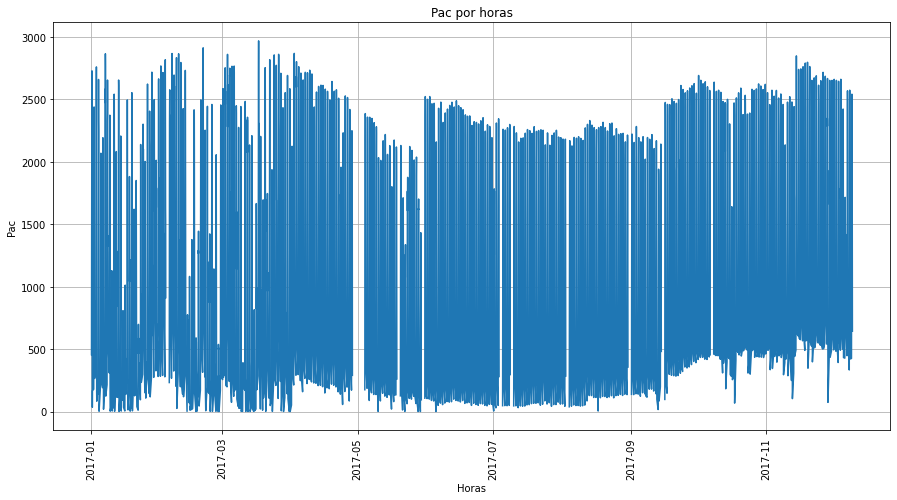

In [32]:
col_name = 'Pac'
fecha_ini = pd.to_datetime('2017-01-01')
fecha_fin = pd.to_datetime('2018-01-01')
plot_between_dates_by_hour(data, col_name, fecha_ini, fecha_fin)

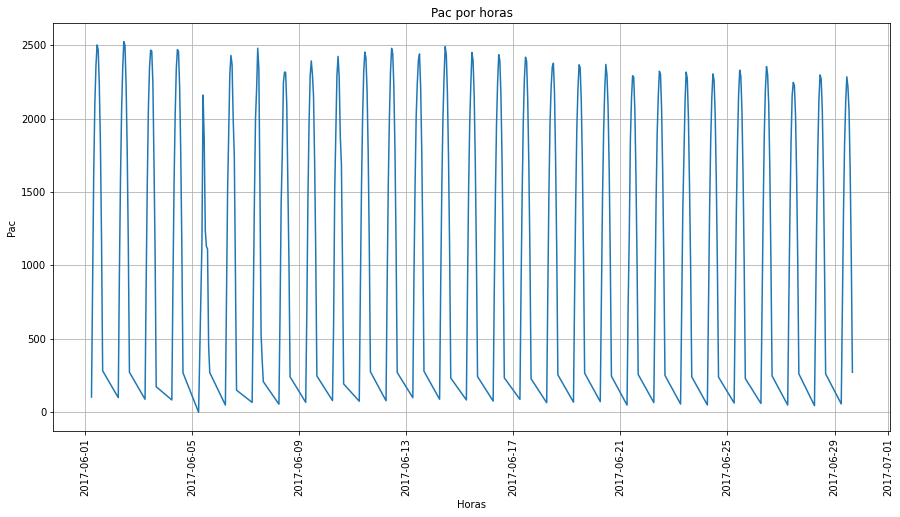

In [33]:
col_name = 'Pac'
fecha_ini = pd.to_datetime('2017-06-01')
fecha_fin = pd.to_datetime('2017-06-30')
plot_between_dates_by_hour(data, col_name, fecha_ini, fecha_fin)

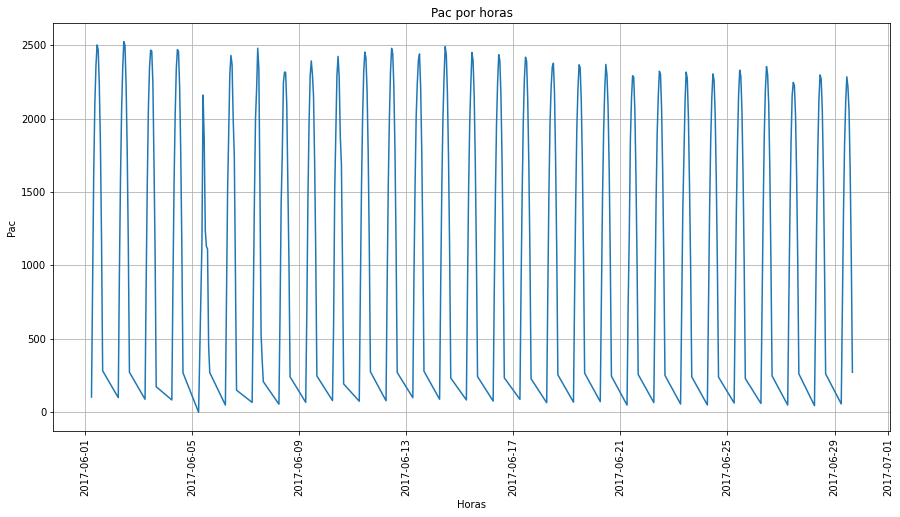

In [34]:
col_name = 'Pac'
fecha_ini = pd.to_datetime('2017-06-01')
fecha_fin = pd.to_datetime('2017-06-30')
plot_between_dates_by_hour(data, col_name, fecha_ini, fecha_fin)

In [35]:
# plot_pacf(data['Pdc']);
# plot_acf(data['Pdc']);

In [36]:
# ad_fuller_result = adfuller(data['Pdc'])
# print(f'ADF Statistic: {ad_fuller_result[0]}')
# print(f'p-value: {ad_fuller_result[1]}')

### Graficos por hora del día

#### Plot para las 8

In [37]:
def plot_all_year_for_an_hour (data, hour, col_name, fecha_ini=None, fecha_fin=None):
  if fecha_ini is not None and fecha_fin is not None:
    data = data.loc[fecha_ini:fecha_fin]
  plt_data = data.loc[data.index.hour==hour]
  plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
  plt.plot(plt_data.index, plt_data[col_name])
  plt.title(col_name+' para la hora '+str(hour))
  plt.ylabel(col_name)
  plt.xlabel('Fecha')
  plt.xticks(rotation=90)
  plt.grid(True)
  plt.show()

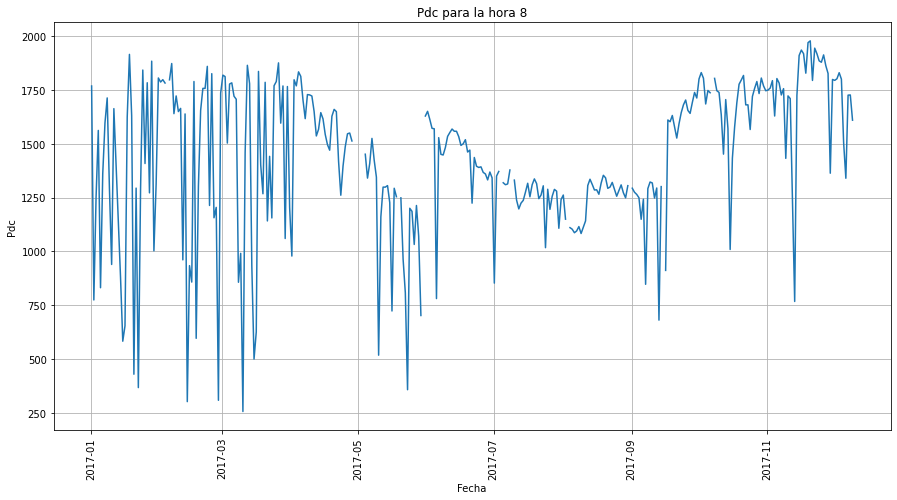

In [38]:
col_name = 'Pdc'
# fecha_ini = pd.to_datetime('2015-06-09')
# fecha_fin = pd.to_datetime('2015-06-20')
plot_all_year_for_an_hour(data, 8, col_name)#, fecha_ini, fecha_fin)

### Boxplot para todas las horas 

In [39]:
def boxplot_all_data_for_an_hour (data, hours, col_name, fecha_ini=None, fecha_fin=None, mes=None):
  if fecha_ini is not None and fecha_fin is not None:
    data = data.loc[fecha_ini:fecha_fin]
  # plt_data = data.loc[data.index.hour==hour]
  my_dict={hour:(data.loc[data.index.hour==hour][col_name].dropna()) for hour in hours}
  
  plt.figure(figsize=[15, 7.5]); # Set dimensions for figure
  fig, ax = plt.subplots()
#   print(dir(fig))
  fig.set_size_inches(15, 7.5)
  ax.boxplot(my_dict.values())
  ax.set_xticklabels(my_dict.keys())
  if mes:
    plt.title(col_name+' para cada hora para mes '+str(mes))
  else:
    plt.title(col_name+' para cada hora ')
  plt.ylabel(col_name)
  plt.xlabel('Horas')
  plt.xticks(rotation=90)
  plt.grid(True)
  plt.show()

<Figure size 1080x540 with 0 Axes>

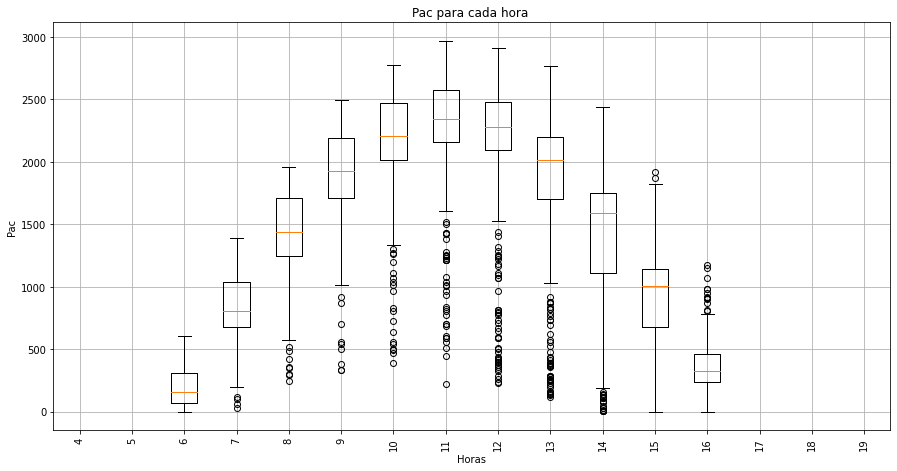

In [40]:
col_name = 'Pac'
# fecha_ini = pd.to_datetime('2015-06-09')
# fecha_fin = pd.to_datetime('2015-06-20')
boxplot_all_data_for_an_hour(data, range(4,20), col_name)#, fecha_ini, fecha_fin)

#### Gráficos para todas las horas para cada mes

In [41]:
# def plot_n_boxplots(data_ls, n, col_name):
#     fig, (ax1, ax2) = plt.subplots(n, sharex=True)
#     fig.suptitle('Aligning x-axis using sharex')
#     ax1.plot(x, y)
#     boxplot_all_data_for_an_hour
#     ax2.plot(x + 1, -y)

<Figure size 1080x540 with 0 Axes>

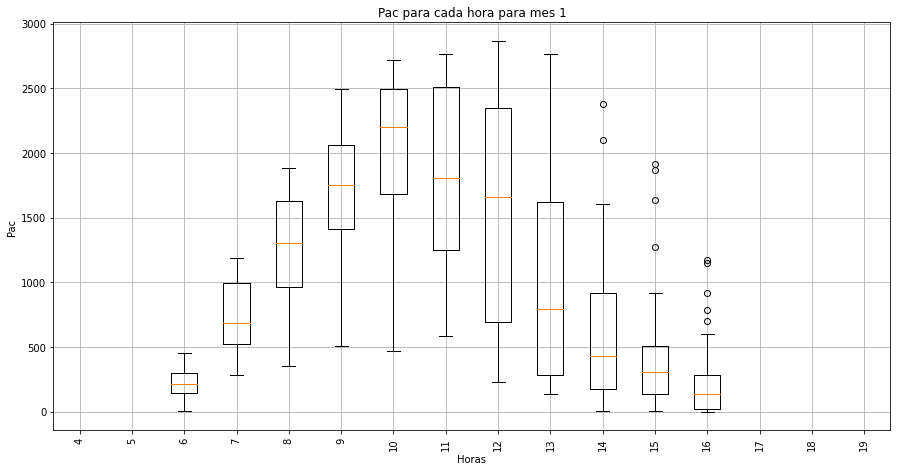

<Figure size 1080x540 with 0 Axes>

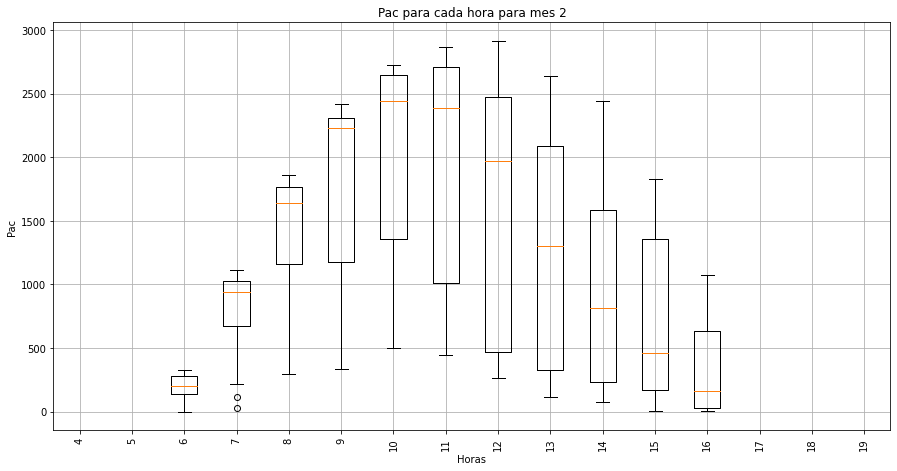

<Figure size 1080x540 with 0 Axes>

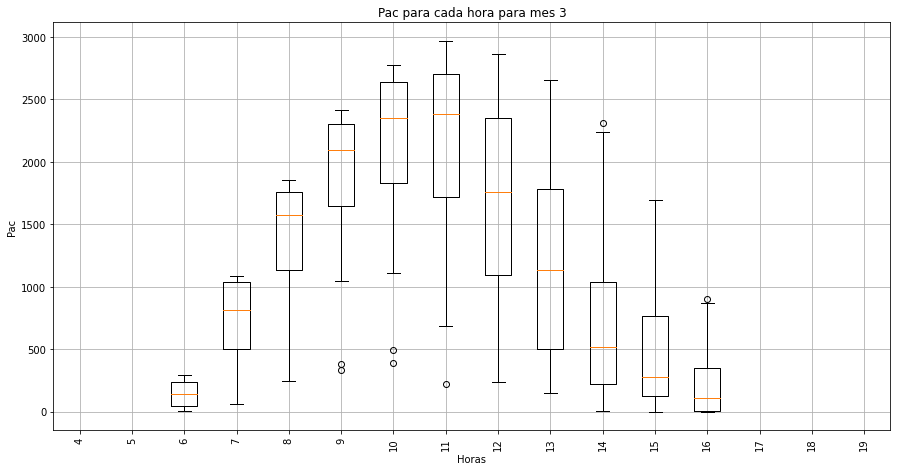

<Figure size 1080x540 with 0 Axes>

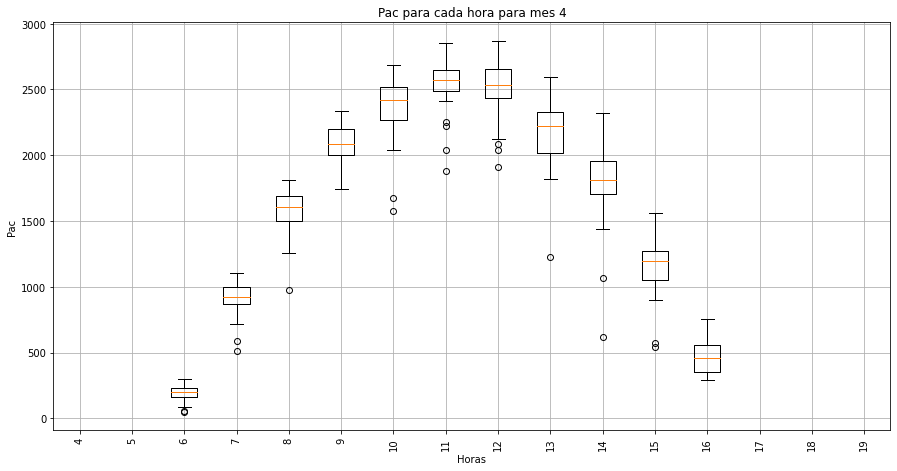

<Figure size 1080x540 with 0 Axes>

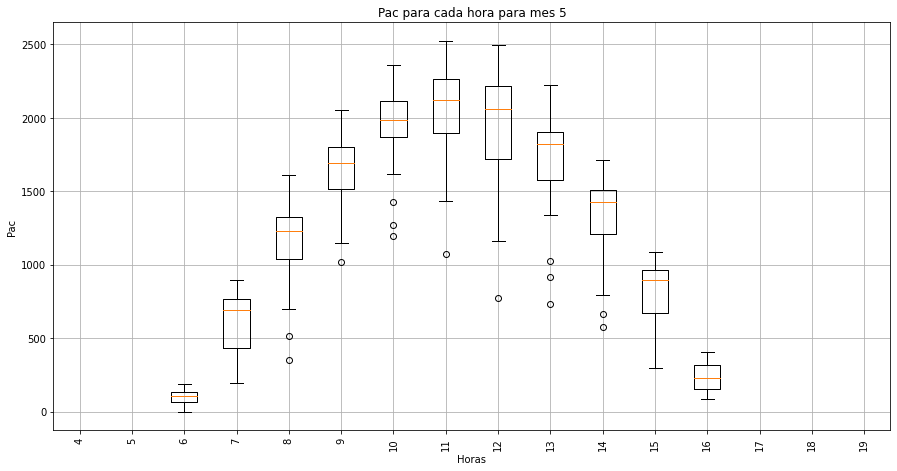

<Figure size 1080x540 with 0 Axes>

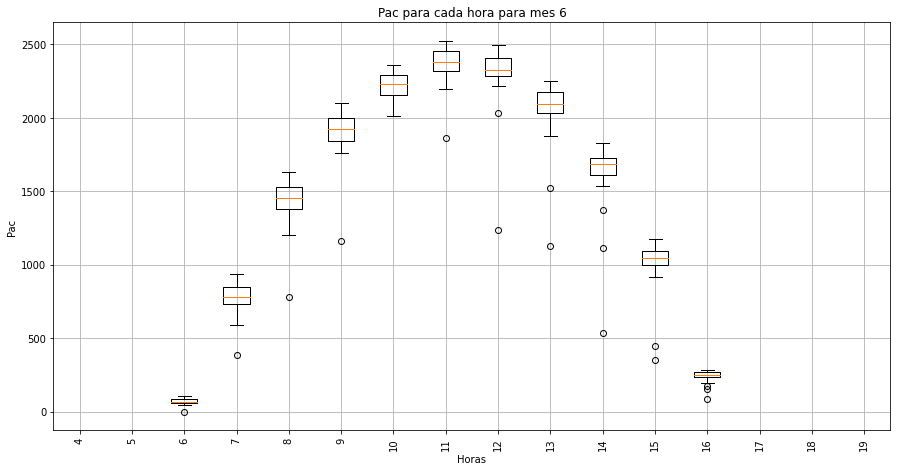

<Figure size 1080x540 with 0 Axes>

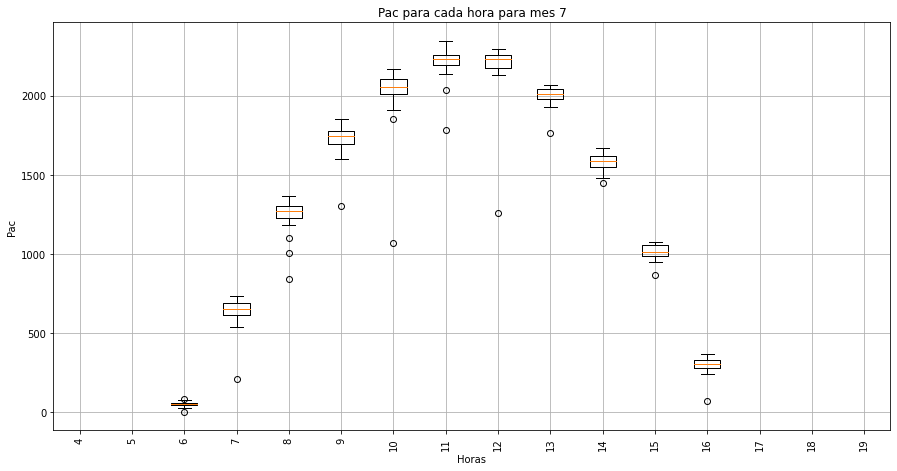

<Figure size 1080x540 with 0 Axes>

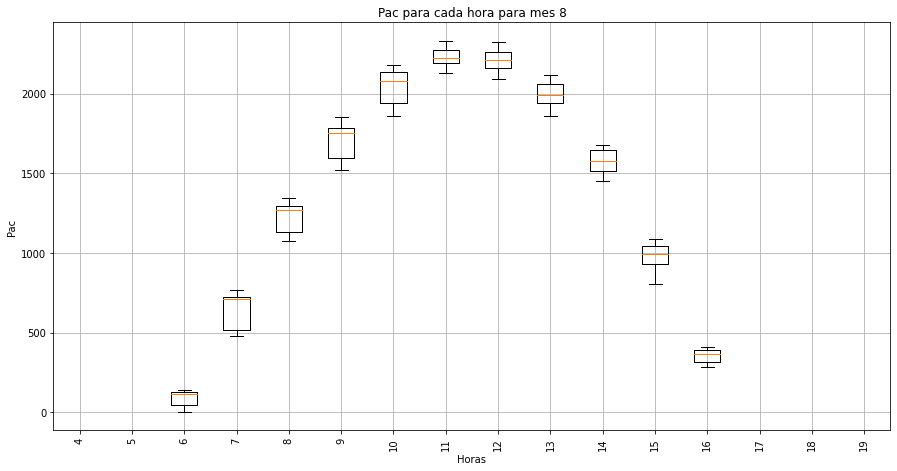

<Figure size 1080x540 with 0 Axes>

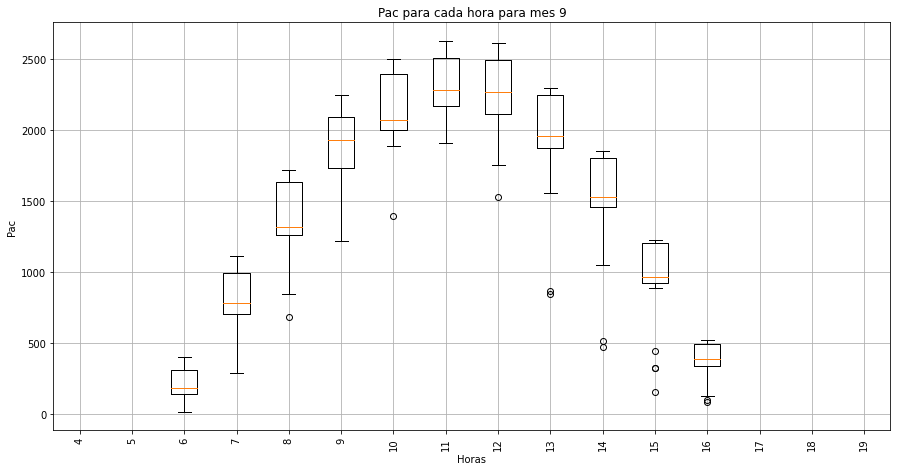

<Figure size 1080x540 with 0 Axes>

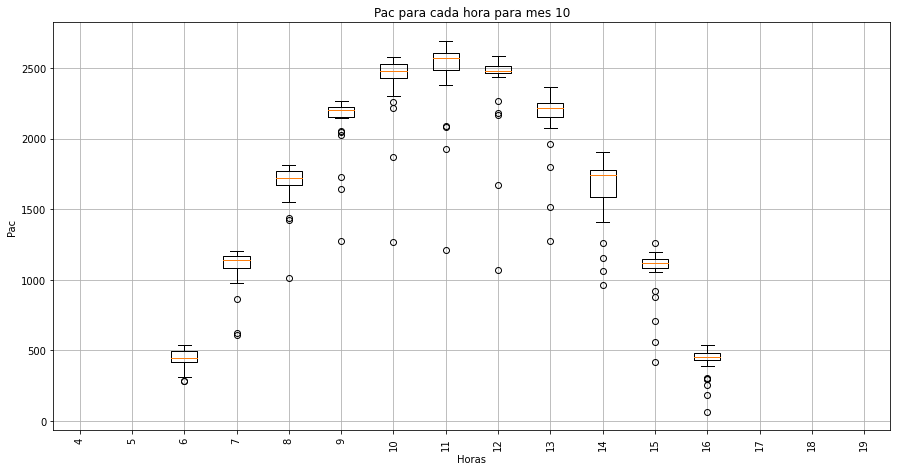

<Figure size 1080x540 with 0 Axes>

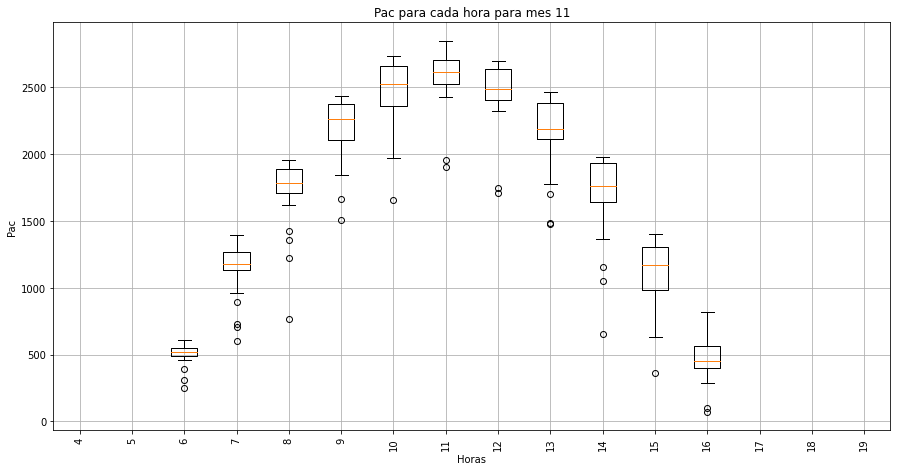

<Figure size 1080x540 with 0 Axes>

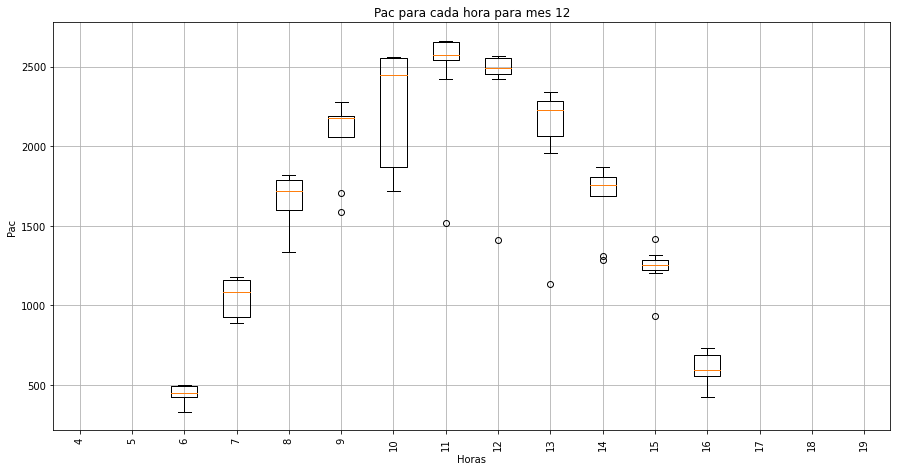

In [42]:

col_name = 'Pac'
for i in range(1,12+1):
    data_m = data.loc[data.index.month==i]
    boxplot_all_data_for_an_hour(data_m, range(4,20), col_name, mes=i)